In [1]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import *
from quantstats._plotting.wrappers import distribution
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import df2img
from datetime import date

# my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve

In [13]:
SPY_history = pd.read_csv('SPY_history.csv') 
SPY_history = SPY_history.set_index('Date')
SPY_history

def dataframe_strd_dev(data, window):
    df_output = pd.DataFrame()

    list_securities = data.columns
    for security in list_securities:
        #crating array to store the indexes (one per day)
        array_value = np.array([])
        for i in range(len(data) - window): 
            array_value = np.append(array_value, np.std(data[security][i:i+window]))
            
        # assign new array as column of the df
        df_output[security] = array_value
        
    return df_output

SPY_history

,Open,High,Low,Close,Volume,SPY R
Date,,,,,,
23/01/2007,142.26,143.08,142.06,142.80,54091000,NaN
24/01/2007,142.97,143.98,142.91,143.95,56469800,0.008053
25/01/2007,143.84,143.92,142.01,142.26,74967600,-0.011740
26/01/2007,142.57,142.65,141.58,142.16,74588304,-0.000703
29/01/2007,142.19,142.80,141.74,142.05,66216700,-0.000774
...,...,...,...,...,...,...
08/04/2022,447.97,450.63,445.94,447.57,79272711,-0.002674
11/04/2022,444.11,445.00,439.39,439.92,89770538,-0.017092
12/04/2022,443.08,445.75,436.65,438.29,84363635,-0.003705


In [90]:
array_value_stdv = np.array([])
for i in range(30,len(SPY_history['SPY R'])):
    array_value_stdv = np.append(array_value_stdv, np.std(SPY_history['SPY R'][i-30:i]))

array_value_stdv

array([0.0096577 , 0.00949552, 0.00950816, ..., 0.01345328, 0.01316461,
       0.0129105 ])

In [68]:
array_value1 = np.array([])
for i in range(len(SPY_history['SPY R'])):
    array_value1 = np.append(array_value1, np.std(SPY_history['SPY R'][i:i+30]))

print(array_value1[-50:-29])


#np.correlate(array_value, array_value1)
exel_std = 0.013308286
numpy_std = np.std([-0.00812467
,-0.02947914
,-0.007581718
,0.026810811
,-0.004515571
,-0.012715051
,-0.007308306
,0.021990408
,0.02217425
,0.012510904
,0.007821888
,-0.00029245
,0.011701433
,-0.0128784
,0.015074358
,0.004883571
,0.007113035
,0.012370863
,-0.006174846
,-0.015391323
,0.002834116
,0.008566634
,-0.012631349
,-0.009999335
,0.005038968
,-0.002673976
,-0.017092298
,-0.003705219
,0.011453604
,-0.012451783
])

print(f'the standard deviation computed in excel is: {exel_std}, the one computed through numpy is:{pandas_std}')


[0.01542352 0.01492284 0.01489679 0.01503655 0.01514191 0.01515663
 0.01482542 0.01439016 0.01449976 0.0143154  0.01461566 0.01404453
 0.01402695 0.01408748 0.01379654 0.0135961  0.0130731  0.01345328
 0.01316461 0.0129105  0.0130846 ]
the standard deviation computed in excel is: 0.013308286, the one computed through numpy is:0.013084601844071451


In [76]:
def compute_park_volatility(df_high_low, list_securities, window):
    '''
    input
    df = pandas dataframe with columns named: "security_low" and "security_high" (e.g. SSO_low SSO_high)
    list_securities = list of securities name
    window = int, number of days the index has to consider

    output
    df_output = pandas dataframe with securities as columns and parkinson volat estimator as rows

    '''


    k = np.sqrt(1/(4*window*np.log(2)))
    df_output = pd.DataFrame()

    for security in list_securities:
        #crating array to store the indexes (one per day)
        array_value = np.array([])
        for i in range(len(df_high_low) - window):
            
            #creating array where storing the log((High_price/Low_price)^2)
            array_day_value = np.array([])
            for j in range(window):
                #array_day_value = np.array([])

                #appending the value (one for each window day)
                array_day_value = np.append(array_day_value, np.log((df_high_low[security + '_high'][i+j] / df_high_low[security + '_low'][i+j]))**2)
                # len(array_day_value) = window
            square_sum_value = np.sqrt(np.sum(array_day_value))
            array_value = np.append(array_value, k*square_sum_value)

        #dict_security_park_indx[security] = array_value
        df_output[security] = array_value
    return df_output #dict_security_park_indx,

In [69]:
SPY_history

,Open,High,Low,Close,Volume,SPY R
Date,,,,,,
23/01/2007,142.26,143.08,142.06,142.80,54091000,NaN
24/01/2007,142.97,143.98,142.91,143.95,56469800,0.008053
25/01/2007,143.84,143.92,142.01,142.26,74967600,-0.011740
26/01/2007,142.57,142.65,141.58,142.16,74588304,-0.000703
29/01/2007,142.19,142.80,141.74,142.05,66216700,-0.000774
...,...,...,...,...,...,...
08/04/2022,447.97,450.63,445.94,447.57,79272711,-0.002674
11/04/2022,444.11,445.00,439.39,439.92,89770538,-0.017092
12/04/2022,443.08,445.75,436.65,438.29,84363635,-0.003705


In [79]:
i = len(SPY_history) - 30 
array_day_value = np.array([])
for j in range(30):
    #appending the value (one for each window day)
    array_day_value = np.append(array_day_value, np.log(SPY_history['High'][i+j] / SPY_history['Low'][i+j])**2)
    
array_day_value

array([1.62539147e-04, 9.23555267e-04, 8.24152741e-04, 2.46441881e-04,
       2.00121903e-04, 4.74612697e-04, 4.34699955e-04, 3.96946768e-04,
       6.39561794e-04, 3.24978576e-04, 3.00090660e-04, 1.69802326e-04,
       1.10894386e-04, 1.14815272e-04, 1.64436156e-04, 1.01916715e-04,
       1.66784682e-04, 1.13192754e-04, 1.06271521e-04, 2.79062161e-04,
       9.16312179e-05, 1.04636518e-04, 3.11537800e-04, 1.49739711e-04,
       2.56457758e-04, 1.09457417e-04, 1.60956944e-04, 4.25444164e-04,
       2.02172358e-04, 2.55338242e-04])

In [92]:
window = 30
k = np.sqrt(1/(4*window*np.log(2)))

array_value_pk = np.array([])
for i in range(len(SPY_history) - window):
    #creating array where storing the log((High_price/Low_price)^2)
    array_day_value_pk = np.array([])
    for j in range(30):
        #appending the value (one for each window day)
        array_day_value_pk = np.append(array_day_value_pk, np.log(SPY_history['High'][i+j] / SPY_history['Low'][i+j])**2)

    square_sum_value = np.sqrt(np.sum(array_day_value_pk))
    array_value_pk = np.append(array_value_pk, k*square_sum_value)

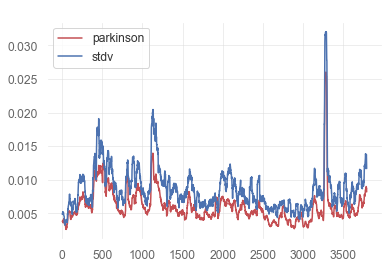

In [119]:
plt.plot(array_value_pk, label = 'parkinson', color = 'r')
plt.plot(array_value_stdv, label = 'stdv', color = 'b')
plt.title('SPY volatility estimator', color = 'white')
plt.legend()
plt.show()

In [115]:
TLT_history = pd.read_csv('TLT_history.csv') 
TLT_history.set_index(SPY_history.index, inplace = True)
TLT_history

,Open,High,Low,Close,Volume,TLT R
Date,,,,,,
23/01/2007,88.02,88.05,87.57,87.62,1096800,NaN
24/01/2007,87.66,87.70,87.50,87.61,463700,-0.000114
25/01/2007,87.45,87.47,86.88,86.98,1397000,-0.007191
26/01/2007,86.78,87.08,86.61,86.91,1737300,-0.000805
29/01/2007,87.06,87.10,86.60,86.72,1015300,-0.002186
...,...,...,...,...,...,...
08/04/2022,125.45,125.83,124.26,125.12,26859158,-0.010831
11/04/2022,123.92,124.19,122.56,123.14,30020696,-0.015825
12/04/2022,124.05,124.16,122.67,122.97,23124178,-0.001381


In [116]:
array_value_stdv = np.array([])
for i in range(30,len(TLT_history['TLT R'])):
    array_value_stdv = np.append(array_value_stdv, np.std(TLT_history['TLT R'][i-30:i]))

array_value_stdv

array([0.00490455, 0.00485048, 0.00485869, ..., 0.01312152, 0.01286051,
       0.01166536])

In [117]:
window = 30
k = np.sqrt(1/(4*window*np.log(2)))

array_value_pk = np.array([])
for i in range(len(TLT_history) - window):
    #creating array where storing the log((High_price/Low_price)^2)
    array_day_value_pk = np.array([])
    for j in range(30):
        #appending the value (one for each window day)
        array_day_value_pk = np.append(array_day_value_pk, np.log(TLT_history['High'][i+j] / TLT_history['Low'][i+j])**2)

    square_sum_value = np.sqrt(np.sum(array_day_value_pk))
    array_value_pk = np.append(array_value_pk, k*square_sum_value)

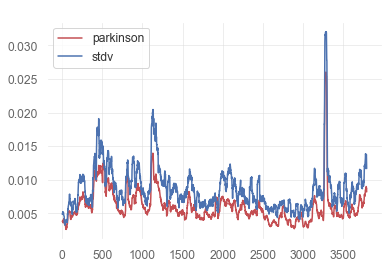

In [118]:
plt.plot(array_value_pk, label = 'parkinson', color = 'r')
plt.plot(array_value_stdv, label = 'stdv', color = 'b')
plt.title('SPY volatility estimator', color = 'white')
plt.legend()
plt.show()